# Voltage Dividers

 Author : Mahdy Albaji

 contact : mahdyalbajieng@gmail.com
 
# Layout : 
### 1- Introduction

### 2- Ideal Voltage Divider 

### 3- Voltage Dividers on a Logarithmic Scale 

### 4- Multiple-Tap Voltage Divider

### 5- Thevenin Equivalent of the Voltage Divider 

### 6- Meta: Thevenin Equivalents are Useful as Voltage Dividers

### 7- Loaded Voltage Dividers 

### 8- Parallel Resistance Intuition 

### 9- Voltage Divider Approximations 

### 10- Solving for an Unknown Resistance 

### 11- Applications

### 12- Prohibited uses

### 13- Conclusion

### 14- References

# Introduction

**A voltage divider** is a passive linear circuit that produces an output voltage (Vout) that is a fraction of 
its input voltage (Vin). It usually consists of two resistors in series, which allows it to convert a higher voltage to a lower resistance.in fact Voltage dividers are just particular combinations of resistors in series when connected to ideal voltage and current sources.
- reminder : The voltage of two parallel resistors is equal.

**Voltage Dividers** are often a useful shortcut when analyzing larger circuits. (Since more complex subcircuits can be approximated as a resistor, the terminology and techniques here can be applied more broadly beyond resistors.) We start with the ideal case, look at the non-ideal case, and then time the approximations. We show They are useful in design and analysis.

![title](pictures/Figure_1.jpg)
- Figure(1): Voltage Divider Module for Arduino

# Ideal Volatage Divider

There are two important parts to voltage dividers: **the circuit** and **the circuit equation**

A voltage divider involves applying a voltage source to two resistors in series, you may have noticed,

There are several different methods, but they are basically the same circuit.

![title](pictures/Figure_2.png)
- Figure(2): Schematic examples of voltage dividers. Long and short resistors, same/different angles, etc.

### Understanding Voltage Dividers: Analyzing **R1**, **R2**, and **Vout**

We call the resistor closest to the input voltage **R1** and the resistor closest to the ground **R2**. We call the voltage drop in **R2** **Vout**, which creates the voltage divider of our circuit. It all depends on the circuit, **Vout** is our voltage divided by a fraction of the input voltage.

### Equation of voltage dividers

Consider the following circuit : 

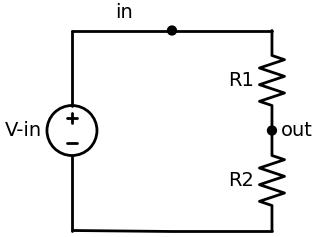

In [81]:
import schemdraw
from schemdraw import elements as e
with schemdraw.Drawing() as d: # Here we connect a voltage source with two resistors in series
    v = e.SourceV().label("V-in").length(4)
    e.Line().right(2).dot().label('in') # Display the input voltage
    e.Line().right(2)
    e.Resistor().down(2).label("R1")
    dot = e.Dot().label('out', loc= 'right') # Display the output voltage
    e.Resistor().down(2).label('R2')
    e.Line().to(v.start)

As mentioned, when a voltage is applied across the pair, the output voltage is a fraction of the input voltage. 

This can be seen by using **Kirchhoff's voltage law** plus **Ohm's law** to write the sum of the voltage differences around the loop :

$$ -Vin + iR1 + iR2 = 0$$

$$ Vin = i(R1+R2) $$

\begin{equation}  
\frac{Vin}{(R1+R2)} = i  
\end{equation}
$$ Equation(1)$$

Now we can write Ohm’s Law for R2:
$$ Vout = iR2 $$ 
and substitute in our expression for the loop current **i** above:
\begin{equation}  
\ Vout = Vin(\frac{R2}{R1 + R2})
\end{equation}
$$ Equation(2)$$
- This relationship states that the output voltage is **directly** proportional to the input voltage and the ratio of **R1** and **R2**.
- This equation holds for any impedances like resistance, capacitance, inductance, etc.

For convenience, we’ll pull out the fraction *f*, the **voltage divider ratio**:
$$ f = \frac{R2}{R1 + R2} $$
where $$Vout=Vin⋅f$$
Since resistances can’t be **negative**, *0≤f≤1*

### Simplifying the equation of voltage dividers
When using voltage dividers, some general points should be taken into account. 

These simplifications make checking the voltage divider circuit a little easier.

1. In the relatively common special case of two equal resistances R1 = R2 , the ratio: $$f = \frac{1}{2}$$
-  the output voltage is half of the input. Regardless of the resistor values, it is the same.
2. If **R1 >> R2** : *f* --> 0 : $$Vout ≈ Vin.\frac{0}{R1} = 0$$
- If **R2** is much smaller than **R1**, the output voltage will be small compared to the input. 
Most of the input voltage falls on **R1**.
3. If **R1 << R2** : *f* --> 1 : $$Vout ≈ Vin.\frac{R2}{R2} = Vin $$
- If **R2** is much larger (at least an order of magnitude) than **R1**, 
the output voltage is too close to the input. There is a small voltage across **R1**.

# Voltage Dividers on a Logarithmic Scale

Because a voltage divider outputs a multiplicatively-scaled version of the input signal, 
if we take the logarithm of both sides (in any base), 
we find that the voltage divider ratio turns into an additive constant:
$$ Vout = Vin.f$$
$$ log(Vout) = log(Vin) + log(f)$$
As *f≤1*,it will always be the case that *log(f)≤0*.

Here’s an example with a function generator driving a voltage divider where we’re plotting the voltages on a log scale:

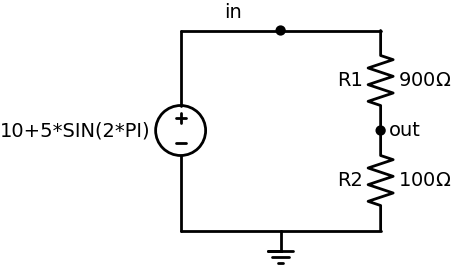

In [82]:
import schemdraw
from schemdraw import elements as e
with schemdraw.Drawing() as d:
    d.config(2)
    v = e.SourceV().label("10+5*SIN(2*PI)").length(4)
    e.Line().right(2).dot().label('in')
    e.Line().right(2)
    e.Resistor().down(2).label("R1").label(r'$900\Omega$',loc='bottom')
    dot = e.Dot().label('out', loc= 'right')
    e.Resistor().down(2).label('R2').label(r'$100\Omega$',loc='bottom')
    e.Line().length(2).left()
    d.push()
    e.Ground()
    d.pop()
    e.Line().to(v.start)

Notice how on a log scale, the two traces appear simply vertically shifted by a constant offset.

![title](pictures/Figure_3.png)
- Figure(3): Understanding Vertical Shifts on a Logarithmic Scale
### Analysis with PySpice
In the analysis of the above circuit, it can be seen that the analysis in the logarithmic scale provides comprehensible numbers:

In [83]:
# import pyspice and Math 
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
import math 

from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Create a new circuit
circuit = Circuit('Voltage Divider')
# Initialization of source and resistors
circuit.V('input',1,circuit.gnd,10 + 5 * math.sin(2*math.pi))
circuit.R(1, 1, 2, 900@u_Ω)
circuit.R(2, 2, circuit.gnd, 100@u_Ω)
# Create a simulator
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
# Start Analysis
analysis = simulator.operating_point()
# print
for node in analysis.nodes.values():
    print('Node {}: {:5.2f} V'.format(str(node), float(node)))

Node 2:  1.00 V
Node 1: 10.00 V


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21676\3422020804.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Node {}: {:5.2f} V'.format(str(node), float(node)))


# Multiple-Tap Voltage Divider 
Voltage dividers can be made with N series resistors to have N−1
nodes between them. As long as there’s no current entering or leaving the voltage divider chain, from the point of view of any particular tap, the resistors “above” can be combined into one, and the resistors “below” can be combined into another.

This makes it easy to create a large number of voltage ratios given a single input. For example:

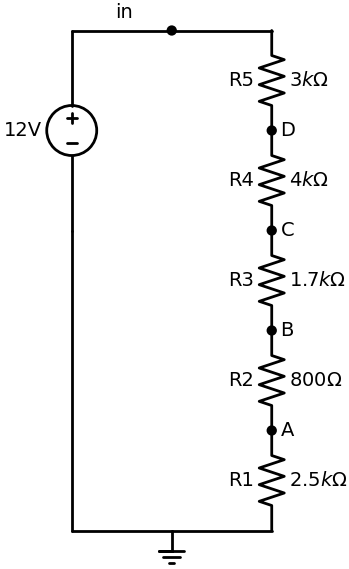

In [84]:
import schemdraw
from schemdraw import elements as e
# Create a Drawing
with schemdraw.Drawing() as d:
    # Scaled down for better display
    d.config(2)
    # Initialization of source
    v = e.SourceV().label("12V").length(4)
    e.Line().right(2).dot().label('in')
    e.Line().right(2)
    # Initialization of Resistor
    e.Resistor().down(2).label("R5").label(r'$3k\Omega$',loc='bottom')
    e.Dot().label('D',loc='rgt')
    e.Resistor().down(2).label('R4').label(r'$4k\Omega$',loc='bottom')
    e.Dot().label('C',loc='rgt')
    e.Resistor().down(2).label('R3').label(r'$1.7k\Omega$',loc='bottom')
    e.Dot().label('B',loc='rgt')
    e.Resistor().down(2).label('R2').label(r'$800\Omega$',loc='bottom')
    e.Dot().label('A',loc='rgt')
    e.Resistor().down(2).label('R1').label(r'$2.5k\Omega$',loc='bottom')
    e.Line().length(2).left()
    d.push()
    e.Ground()
    d.pop()
    e.Line().tox(v.start)
    e.Line().to(v.start)

The schematic above uses five resistors in series. It turns a 12-volt input into four different outputs, which might be useful in a computer’s power supply.

As it’s a series circuit, there’s only one current, and it’s easily determined by considering the resistors in series:
$$ i(total) = \frac{Vin}{ΣR} $$
Any one resistor’s voltage drop is then just:
$$Δv_n = R_n⋅i(total)$$
and the fraction of the total voltage drop across any one resistor $R_n$ is:
$$f_n= \frac{Δv_n}{Vin}$$
$$f_n= \frac{R_n.i(total)}{Vin}$$
$$f_n= (\frac{R_n}{Vin})(\frac{Vin}{ΣR})$$
$$f_n= \frac{R_n}{ΣR}$$
- The fractional voltage drop across one resistor is just the ratio of its resistance to the sum of all resistances.

For the five resistors in series above, we can calculate the voltages at each node (relative to ground) by looking at the ratio of resistance “below” that node (i.e. between that node and ground) to the total resistance of the chain. In this example with nodes and resistors as labeled above:
$$ v_A = (Δv_1) = Vin(f_1)$$
$$ v_B = (Δv_1 + Δv_2) = Vin(f_1+f_2)$$
$$ v_C = (Δv_1 + Δv_2 + Δv_3) = Vin(f_1+f_2+f_3)$$
$$ v_D = (Δv_1 + Δv_2 + Δv_3 + Δv_4) = Vin(f_1+f_2+f_3+f_4)$$
- When we work out the solution for the circuit above:
$$ v_A = Vin(\frac{R1}{R1+R2+R3+R4+R5}) = 2.5V$$
$$ v_B = Vin(\frac{R1+R2}{R1+R2+R3+R4+R5}) = 3.3V$$
$$ v_C = Vin(\frac{R1+R2+R3}{R1+R2+R3+R4+R5}) = 5.0V$$
$$ v_D = Vin(\frac{R1+R2+R3+R4}{R1+R2+R3+R4+R5}) = 9.0V$$
As we’ll see later, this type of circuit is not very power efficient and would not be able to supply much current( $vin=12V$ 
and $∑R=12kΩ$ so that $itotal=1mA$). 
However, it would be one potentially valid way to turn a single reference voltage into a number of other proportional reference voltages, which could then be used as part of a feedback loop in an efficient switching power supply design.
### Analysis with PySpice
To measure the accuracy of the obtained values, we analyze the above circuit using PySpice :

In [85]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Create a new circuit
circuit = Circuit('Voltage Divider')
# Initialization of source and resistors
circuit.V('input', 1, circuit.gnd, 12@u_V)
circuit.R(5, 1, 2, 3@u_kΩ)
circuit.R(4, 2, 3, 4@u_kΩ)
circuit.R(3, 3, 4, 1.7@u_kΩ)
circuit.R(2, 4, 5, 0.8@u_kΩ)
circuit.R(1, 5, circuit.gnd, 2.5@u_kΩ)
# Create a simulator
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
# Start Analysis
analysis = simulator.operating_point()
# print
for node in analysis.nodes.values():
    print('Node {}: {:5.2f} V'.format(str(node), float(node)))

Node 5:  2.50 V
Node 4:  3.30 V
Node 3:  5.00 V
Node 2:  9.00 V
Node 1: 12.00 V


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21676\3071606079.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Node {}: {:5.2f} V'.format(str(node), float(node)))


# Thevenin Equivalent of the Voltage Divider 
When we include a driving voltage source, we can include consider what happens when we look at the intermediate terminal of a voltage divider to find the Thevenin equivalent circuit :

![title](pictures/Figure_4.png)
- Figure(4): the Thevenin equivalent ofthis voltage divider, looking into terminals A and B

The open-circuit voltage is just the voltage we’d measure across these terminals with no external current flow, which is just the fractional input voltage we calculated above:
$$ Veq = Vout,unloaded = Vin(\frac{R2}{R1+R2}) $$
Once we start to allow current to flow externally to and from these terminals, the measured voltage will change. 
As described in the Thevenin section, we can insert a test current source and set all independent sources to **zero** to calculate the **equivalent resistance**:

![title](pictures/Figure_5.png)
- Figure(5): Thevenin Equivalent Circuit Test Current

From here, it’s clear that the equivalent resistance is that of the two resistors in **parallel**:
$$ Req = (R_1 || R_2) = \frac{R_1 R_2}{R_1+R_2}$$
Thus, *the two-resistor voltage divider* looks like *a one-resistor Thevenin equivalent circuit*:

![title](pictures/Figure_6.png)
- Figure(6): Thevenin Equivalent Circuit

# Meta: Thevenin Equivalents are Useful as Voltage Dividers
We just transformed a two-resistor voltage divider into a one-resistor Thevenin equivalent circuit, which has identical current-voltage curve behavior with respect to some externally-connected load. But once we have a Thevenin equivalent circuit, often the most useful thing to do with it is to connect it to some external load. If that load is a resistor, then we’ve just formed a new voltage divider.

For example, we could take the three-resistor circuit on the left and consider R1 and R2 to form a voltage divider, and then replace them with their Thevenin equivalent:

### Original Voltage Divider

<>:9: SyntaxWarning: invalid escape sequence '\O'
<>:12: SyntaxWarning: invalid escape sequence '\O'
<>:15: SyntaxWarning: invalid escape sequence '\O'
<>:9: SyntaxWarning: invalid escape sequence '\O'
<>:12: SyntaxWarning: invalid escape sequence '\O'
<>:15: SyntaxWarning: invalid escape sequence '\O'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21676\3710455832.py:9: SyntaxWarning: invalid escape sequence '\O'
  R1 = e.Resistor().label("R1\n$3k\Omega$").down().dot()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21676\3710455832.py:12: SyntaxWarning: invalid escape sequence '\O'
  R3 = e.Resistor().label("R3\n$1.5k\Omega$",loc= 'bot').down()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21676\3710455832.py:15: SyntaxWarning: invalid escape sequence '\O'
  R2 = e.Resistor().label("R2\n$1k\Omega$").down()


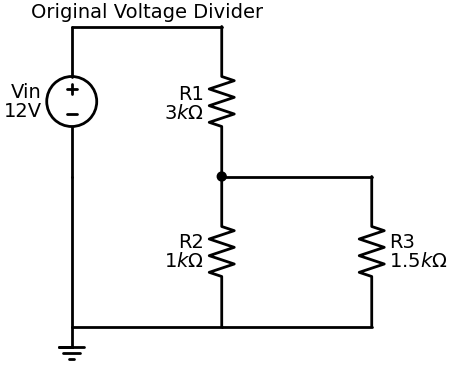

In [86]:
#import schemdraw
import schemdraw 
from schemdraw import elements as e
# Create a Drawing
with schemdraw.Drawing() as d:
    # Initialization of source and resistors
    V = e.SourceV().label("Vin\n12V")
    e.Line().right().label("Original Voltage Divider")
    R1 = e.Resistor().label("R1\n$3k\Omega$").down().dot()
    d.push()
    e.Line().right()
    R3 = e.Resistor().label("R3\n$1.5k\Omega$",loc= 'bot').down()
    e.Line().left()
    d.pop()
    R2 = e.Resistor().label("R2\n$1k\Omega$").down()
    e.Line().left()
    d.push()
    e.Ground()
    d.pop()
    e.Line().up()

### Analysis with PySpice
With Pyspice, the circuit is analyzed and the voltage of each node and the branch current are as follows: 

In [87]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
import math 

from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Create a new circuit
circuit = Circuit('Voltage Divider')
# Initialization of source and resistors
circuit.V('input',1,circuit.gnd,12@u_V)
circuit.R(1, 1, 2, 3@u_kΩ)
circuit.R(2, 2, circuit.gnd, 1@u_kΩ)
circuit.R(3,2,circuit.gnd,1.5@u_kΩ)
circuit.V('test',2,3,0 @u_V)
# Create a simulator
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
# Start Analysis
analysis = simulator.operating_point()
# print Voltage of Nodes
for node in analysis.nodes.values():
    print('Node {}: {:5.2f} V'.format(str(node), float(node)))
# print Current of Branches
for node in analysis.branches.values():
    print('Node {}: {:5.2f} A'.format(str(node), float(node)))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21676\4120531681.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Node {}: {:5.2f} V'.format(str(node), float(node)))


Node 3:  2.00 V
Node 2:  2.00 V
Node 1: 12.00 V
Node vinput: -0.00 A
Node vtest:  0.00 A


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21676\4120531681.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Node {}: {:5.2f} A'.format(str(node), float(node)))


### Thevenin Equivalent of Voltage Divider

<>:8: SyntaxWarning: invalid escape sequence '\O'
<>:10: SyntaxWarning: invalid escape sequence '\O'
<>:8: SyntaxWarning: invalid escape sequence '\O'
<>:10: SyntaxWarning: invalid escape sequence '\O'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21676\2946394754.py:8: SyntaxWarning: invalid escape sequence '\O'
  R = e.Resistor().label("Req\n$750\Omega$",loc='bot').right()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21676\2946394754.py:10: SyntaxWarning: invalid escape sequence '\O'
  R3 = e.Resistor().label("R3\n$1.5k\Omega$",loc= 'bot').down()


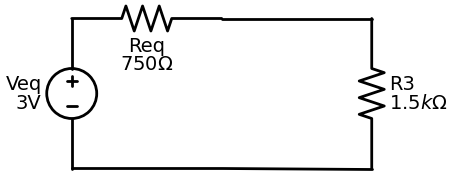

In [88]:
# import schemdraw
import schemdraw 
from schemdraw import elements as e
# Create a new Drawing
with schemdraw.Drawing() as d:
    # Initialization of source and resistors
    V = e.SourceV().label("Veq\n3V")
    R = e.Resistor().label("Req\n$750\Omega$",loc='bot').right()
    e.Line().right()
    R3 = e.Resistor().label("R3\n$1.5k\Omega$",loc= 'bot').down()
    e.Line().tox(V.start)

### Analysis with PySpice
With Pyspice, the circuit is analyzed and the voltage of each node and the branch current are as follows: 

In [89]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Create a new circuit
circuit = Circuit('Voltage Divider')
# Initialization of source and resistors
circuit.V('input',1,circuit.gnd,3@u_V)
circuit.R('eq', 1, 2, 750@u_Ω)
circuit.R(3,2,circuit.gnd,1.5@u_kΩ)
circuit.V('test',2,3,0 @u_V)
# Create a simulator
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
# Start Analysis
analysis = simulator.operating_point()
# print
for node in analysis.nodes.values():
    print('Node {}: {:5.2f} V'.format(str(node), float(node)))
for node in analysis.branches.values():
    print('Node {}: {:5.2f} A'.format(str(node), float(node)))

Node 3:  2.00 V
Node 2:  2.00 V
Node 1:  3.00 V
Node vinput: -0.00 A
Node vtest:  0.00 A


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21676\3320399848.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Node {}: {:5.2f} V'.format(str(node), float(node)))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21676\3320399848.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Node {}: {:5.2f} A'.format(str(node), float(node)))


- By running these simulations, it is concluded that the current passing through R3 is the same in both cases
Replacing a voltage divider by its Thevenin equivalent may itself form a new voltage divider, which can again be solved in the same way. This is a great problem solving technique.

# Parallel Resistance Intuition
What’s the intuition behind the load current in a loaded voltage divider causing a voltage drop proportional to the parallel resistance of R1 and R2, which (before considering the load) appear to be in series?
- A quick way to remember this is to consider the extreme cases and work backwards.
Two modes are considered:
1. **$R_1 = 0$** or **$R_2 = 0$** (but not both at once)
2. **$R_1 = ∞$** or **$R_2 = ∞$** (but not both at once)

### The first Mode
At one extreme, consider **$R_1=0$** or **$R_2=0$** (but not both at once). In this case, the output voltage won’t change at all with **$i_3$**. Zero resistance in parallel with a non-zero resistance is always zero equivalent resistance. In this extreme, the load is directly connected (with zero resistance) to one end of the voltage source.

Here’s how the loaded voltage divider simplifies at the zero-resistance extreme:

![title](pictures/Figure_7.png)
- Figure(7): Voltage Divider Parallel Resistance Intuition with **Zero** Resistance

### The second Mode
At the other extreme, consider **$R_1=∞$** or **$R_2=∞$**(but not both at once). In this case the voltage divider is basically disconnected at one end. Infinite resistance in parallel with a finite resistance is always equal to the finite resistance.
- (For parallel resistances, recall that the total resistance is always smaller than the smallest of the individual resistances. Or equivalently, the total conductance is always greater than the largest of the individual conductances.)

Here’s how the loaded voltage divider simplifies at the infinite-resistance extreme:

![title](pictures/Figure_8.png)
- Figure(8): Voltage Divider Parallel Resistance Intuition with **Infinite** Resistance

> The Dual Effect of Load Current on Current Distribution in Finite Resistances:

What about a case in the middle, where both resistances are finite? One way to think about it is that a small increase in the load current **i3** has a *dual* effect: increasing i1and reducing **i2**. In fact, neither of the two currents **i1** or **i2** need to change by the fullmagnitude of the change in **i3**, because they literally split the difference (with opposite sign, but that’s just a matter of labeling currents):
$$Δi_1 - Δi_2 = Δi_3$$
For example, if **$R_1=R_2$**, then they’ll split the difference equally, with **$Δi_1=\frac{1}{2}Δi_3$**, and **$Δi_2=-\frac{1}{2}Δi_3$**. Because the magnitude of the change in current through each resistor is smaller, its change in voltage is also smaller, simply due to Ohm’s Law.

This illustration shows how the load current is split equally by both of the voltage divider’s resistors when R1 = R2 :

![title](pictures/Figure_9.png)
- Figure(9): Voltage Divider with Equal Resistances Sharing Load Current

# Voltage Divider Approximations 
In practice, essentially all real-world voltage dividers are loaded: something will be connected to the middle terminal so that the intermediate point is useful – or else we would have simply used a single resistor or none at all!

However, as seen in the loaded voltage divider equation, the math for determining **Vout** becomes significantly more complicated once we introduce a load current **i3**. It’d be nice to know when it is and isn’t safe to approximate a voltage divider as being approximately unloaded.
The answer comes from considering the additional voltage drop due to loading to be an approximation error term **Verr** :
$$Vout = Vin(\frac{R_2}{R_1+R_2}) - i_3(\frac{R_1R_2}{R_1+R_2})$$
$$Vout = Vout,ideal + Verr$$
If we focus on only the error term:
$$Verr = -i_3(\frac{R_1R_2}{R_1+R_2})$$
$$Verr = -i3(R_1 || R_2)$$
- If we know the maximum load current magnitude **$|i3,max|$**, and we can decide the maximum voltage error **|verr,max|** we’re willing to tolerate, then we can put a bound on **(R1||R2)** :
$$|i3,max|(R_1 || R_2) ≤ |Verr,max|$$
$$(R_1 || R_2) ≤ \frac{|Verr,max|}{|i3,max|}$$
If our tolerable voltage error is small, the resistances will also have to be small. If our tolerable load current is large, this will also force the resistances to be small. Defining this in terms of maximum tolerances means that even if the actual load current varies, as long as it’s smaller than the maximum load current we designed for, we can be confident that our voltage divider will still be within our design bounds.

This is incredibly useful in practice because it means that we don’t have to design our entire system at once. **Approximations let us partition a large design problem into a series of smaller ones where we’re free to solve one part at a time**.

This has two benefits:
1. Faster design time. It’s often easier to solve two small subproblems than a single large one.
2. More robust performance. The solution we reach by decomposing our system into modules with error bounds may be more tolerant of unintented component variance because it was already designed with calculated error bounds in mind. In contrast, an optimized-all-at-once solution may be surprisingly fragile when some component is 5% different from its desired value. (This fragility risk is especially prevalent once we start adding any nonlinear circuit elements, such as transistors and amplifiers.)

# Solving for an Unknown Resistance 
One common use case for a voltage divider is for measuring an unknown resistance value. For example, we can use a fixed resistance value **$R_1$** and an unknown value **$R_2$** that we’d like to determine. (**$R_2$** might be a temperature-dependent or light-dependent resistor, for example.)In this case, we can measure the voltage divider’s output voltage **Vout**
(using a multimeter or a analog-to-digital converter, for example), and express that as a fraction of the known applied voltage **Vin**. Then we’d solve the ideal voltage divider equation for the unknown resistance as follows:
$$\frac{Vout}{Vin} = f = \frac{R_2}{R_1+R_2}$$
$$fR_1+fR_2 = R_2$$
$$fR_1=(1-f)R_2$$
$$R_2 = R_1(\frac{f}{1-f})$$
If we know **$R_1$**, and we can measure **f** , then calculating **$R_2$** is straightforward.

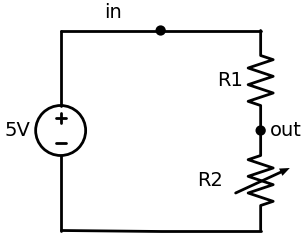

In [90]:
import schemdraw
from schemdraw import elements as e
with schemdraw.Drawing() as d: # Here we connect a voltage source with two resistors in series
    v = e.SourceV().label("5V").length(4)
    e.Line().right(2).dot().label('in') # Display the input voltage
    e.Line().right(2)
    e.Resistor().down(2).label("R1")
    dot = e.Dot().label('out', loc= 'right') # Display the output voltage
    e.ResistorVar().reverse().down(2).label('R2')
    e.Line().to(v.start)

![title](pictures/Figure_10.png)
![title](pictures/Figure_11.png)
- Figure(10,11): Measuring Unknown Resistance with Voltage Divider

The DC Sweep varies R2. The plot is set to show the ratio **f** in the top plot, and then uses the equation above to back-calculate the value of **$R_2$** from the measured voltages.

# Applications
Voltage dividers have various applications, some of which have been introduced, and are also among the most common circuits in electrical engineering. The numbers associated with them are distinctly different. However, only a limited number are presented here.
### Potentiometers
A potentiometer is a variable resistor that can be used to make a voltage divider.

![title](pictures/Figure_12.png)
- Figure(12): Potentiometer surface information: from top left, clockwise: a standard 10K trimmer potentiometer, two-axis joystick, soft potentiometer, sliding potentiometer, classic right angle, a board-fit trimmer potentiometer.

-  Understanding the Functionality of a Potentiometer
Inside the potentiometer is a resistor and a slider that divides the resistance into two parts and moves to adjust the ratio between the two parts of the resistance. Outside it is usually a tripod: two legs are connected to the end of the resistor, and the third connection is placed on the slider.

![title](pictures/Figure_13.png)
- Figure(13): Your symbol ticks a potentiometer. Pin 1 and 3 are the ends of the resistor and pin 2 is connected to the slider.

- If the outputs of the pins are connected to a voltage source (one to ground and the other to Vin), the output (Vout) on the middle pin is the divided voltage. If you turn the potentiometer completely in one direction, the voltage can be zero, if you turn it in the other direction, the output will be equal to the input. If the slider is in the middle, the output voltage is half of the input voltage.
# Prohibited uses
As a tempting method a voltage divider may be used to step down the voltage, converting a 12V voltage source to 5V, voltage dividers should not be used as a load power supply.

Any current required by the load must be supplied through R1. The current and voltage of R1 provide energy that is wasted as heat. If this power exceeds the resistor's tolerance (typically between ⅛W and 1W), heat will cause a major problem, potentially melting the weak resistor…

Basically, a voltage divider is not used as a voltage source for anything that requires a small amount of power.

# Conclusion
Voltage dividers are straightforward and practical components in electronic circuits used to reduce voltage levels. They operate by connecting two resistors in series, and the output voltage across one of the resistors is directly related to the ratio of their values.

In summary, voltage dividers offer a simple and efficient means to adjust voltage levels without the need for complex devices. However, it is essential to consider their limitations and appropriate applications. Among these limitations are the effects of external loads on the output voltage and the necessity for careful selection of resistor values. Ultimately, when employed with precision and understanding of their characteristics, voltage dividers can optimize performance and reduce costs in electronic circuit design.

# References
https://ultimateelectronicsbook.com/voltage-dividers

https://en.wikipedia.org/wiki/Voltage_divider

https://melec.ir/%D8%AA%D9%82%D8%B3%DB%8C%D9%85%E2%80%8C-%DA%A9%D9%86%D9%86%D8%AF%D9%87%E2%80%8C-%D9%87%D8%A7%DB%8C-%D9%88%D9%84%D8%AA%D8%A7%DA%98/


